In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀取指數數據檔案
TXF_DATA = pd.read_excel('台指近月期貨指數.xlsx')
TXF_DATA['日期'] = pd.to_datetime(TXF_DATA['日期'])
TXF_DATA['5日均線'] = TXF_DATA['收盤價'].rolling(5).mean()
TXF_DATA['60日均線'] = TXF_DATA['收盤價'].rolling(60).mean()
TXF_DATA = TXF_DATA.rename(columns={'開盤價':'Open','最高價': 'High', '最低價': 'Low','收盤價':'Close'})
TXF_DATA.set_index('日期', inplace=True)
TXF_DATA.head(5)

,期貨名稱,簡稱,Open,High,Low,Close,報酬率,成交張數(量),未平倉合約數,基差,未沖銷契約數(合計),5日均線,60日均線
日期,,,,,,,,,,,,,
1998-07-21,ZTXA,台指近月期貨指數,8131,8131,8036,8045,NaN,208,137,-95.80,140,NaN,NaN
1998-07-22,ZTXA,台指近月期貨指數,7950,7950,7820,7870,-0.021753,360,279,11.06,288,NaN,NaN
1998-07-23,ZTXA,台指近月期貨指數,7830,7859,7802,7825,-0.005718,190,357,54.89,371,NaN,NaN
1998-07-24,ZTXA,台指近月期貨指數,7750,7835,7740,7835,0.001278,340,420,67.40,443,NaN,NaN
1998-07-27,ZTXA,台指近月期貨指數,7830,7835,7780,7786,-0.006254,150,466,104.30,493,7872.2,NaN


In [3]:
# 讀取結算日數據檔案
monthly_settlement_df = pd.read_excel('settlementDate.xlsx')
monthly_settlement_df = monthly_settlement_df[monthly_settlement_df["契約\n月份"].str.contains("W") == False].sort_values(by='結算日',ascending=True)
monthly_settlement_df['結算日'] = pd.to_datetime(monthly_settlement_df['結算日'])
monthly_settlement_df.rename(columns={'結算日': '日期','契約\n月份':'契約到期月份',
                                      '臺股期貨/小型臺指期貨/微型臺指期貨\n（ TX/MTX/TMF ）':'結算價'}, inplace=True)
monthly_settlement_df['該月結算日'] = 1
monthly_settlement_df.set_index('日期', inplace=True)
monthly_settlement_df.head(5)

,契約到期月份,結算價,該月結算日
日期,,,
1998-09-17,199809,7036,1
1998-10-22,199810,7068,1
1998-11-19,199811,7185,1
1998-12-17,199812,6695,1
1999-01-21,199901,6332,1


In [4]:
# 讀取保證金數據檔案
margin_money_df = pd.read_excel('台指期保證金.xlsx')
margin_money_df.set_index('日期', inplace=True)
margin_money_df = margin_money_df.rename(columns={'保證金':'原始保證金'})
margin_money_df.head(5)

,原始保證金
日期,
1998-07-21,140000
1998-08-19,120000
1999-01-06,150000
1999-01-19,140000
1999-01-29,120000


In [5]:
#合併三個dataframe
df = pd.concat([TXF_DATA, monthly_settlement_df, margin_money_df], axis=1)
#只針對'原始保證金'這個column的缺失值進行補充
df['原始保證金'] = df['原始保證金'].fillna(method='ffill')
# 將不是結算日的天數設為 0
df['該月結算日'] = df['該月結算日'].fillna(0).astype(int)
df.loc[df['結算價'].notna(), 'Close'] = df['結算價']
df = df.drop(columns=['簡稱','成交張數(量)','報酬率','基差','未沖銷契約數(合計)','High', '未平倉合約數','Low','結算價','契約到期月份'])
df=df.dropna()

C:\Users\user\AppData\Local\Temp\ipykernel_12548\482945969.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['原始保證金'] = df['原始保證金'].fillna(method='ffill')


In [6]:
df.iloc[100:150]

,期貨名稱,Open,Close,5日均線,60日均線,該月結算日,原始保證金
日期,,,,,,,
1999-02-25,ZTXA,6395.0,6380.0,6358.0,6521.750000,0,140000.0
1999-02-26,ZTXA,6355.0,6469.0,6423.8,6504.733333,0,140000.0
1999-03-01,ZTXA,6410.0,6419.0,6401.6,6488.166667,0,140000.0
1999-03-02,ZTXA,6450.0,6345.0,6407.6,6471.650000,0,140000.0
1999-03-03,ZTXA,6301.0,6450.0,6412.6,6456.150000,0,140000.0
1999-03-04,ZTXA,6450.0,6388.0,6414.2,6440.600000,0,140000.0
1999-03-05,ZTXA,6400.0,6425.0,6405.4,6424.616667,0,140000.0
1999-03-06,ZTXA,6528.0,6440.0,6409.6,6407.450000,0,140000.0
1999-03-08,ZTXA,6450.0,6465.0,6433.6,6392.666667,0,140000.0


In [7]:
position = None              #原本持倉狀態
Buy_and_Hold = []            #紀錄買進持有的時間點
profit_list = []             #紀錄每天的獲利狀況
executesize = 1              #固定只買進一口
total_profit = 0             #總獲利狀態(剛開始為0)
total_cost = 0
cumulative_profit = []       #紀錄累積獲利
cumulative_profit_dates = [] #紀錄日期
each_day_profit = []
each_day_revenue = []

for i in range(len(df)):
    if i == len(df) - 1:
        break

    previous_total_profit = total_profit  # 記錄更新前的 total_profit

    if position is None:
        profit_list.append(0)
        
        #本身平倉日就不能買
        if df['該月結算日'].iloc[i] == 1:
            position = None
            continue

        # 5日均線 > 60日均線(後勢看漲)則進行買進。
        elif (df['5日均線'].iloc[i] > df['60日均線'].iloc[i]) and df['該月結算日'].iloc[i] == 0:
            buy_price = df['Open'].iloc[i+1]
            profit = executesize * (df['Close'].iloc[i+1] - buy_price) * 200 * (1-0.00002)
            profit_list.append(profit)
            total_profit += profit
            total_cost += df['原始保證金'].iloc[i+1]
            position = 'Buy_and_Hold'
            Buy_and_Hold.append(i+1)
            continue

    #今天交易部位是買進持有的話
    elif position == 'Buy_and_Hold':
        if df['該月結算日'].iloc[i+1] == 0:
            profit = executesize * (df['Close'].iloc[i+1] - df['Close'].iloc[i]) * 200 * (1-0.00002)
            profit_list.append(profit)
            total_profit += profit
        
        elif df['該月結算日'].iloc[i+1] == 1:
            profit = executesize * (df['Close'].iloc[i+1] - df['Close'].iloc[i]) * 200 * (1-0.00002)
            profit_list.append(profit)
            total_profit += profit
            position = None

    # 只有在 total_profit 變化的情況下才更新累積獲利列表
    if total_profit != previous_total_profit:
        cumulative_profit_dates.append(df.index[i])
        cumulative_profit.append(total_profit)
        each_day_profit.append(profit)



In [8]:
print("總獲利", total_profit)
print("總成本", total_cost)
# print("每天的獲利狀況",profit_list)
# print("買進持有的時間點:", Buy_and_Hold)
# print("累積獲利日期狀況",cumulative_profit_dates)
# print("累積獲利狀況",cumulative_profit)
# print("每日獲利狀況",each_day_profit)

總獲利 4640507.188000002
總成本 25797000.0


In [9]:
results_df = pd.DataFrame({
    '日期': cumulative_profit_dates,      
    '每日損益資金(元)': each_day_profit           
})
results_df.to_excel('每日損益紀錄.xlsx', index=False)  

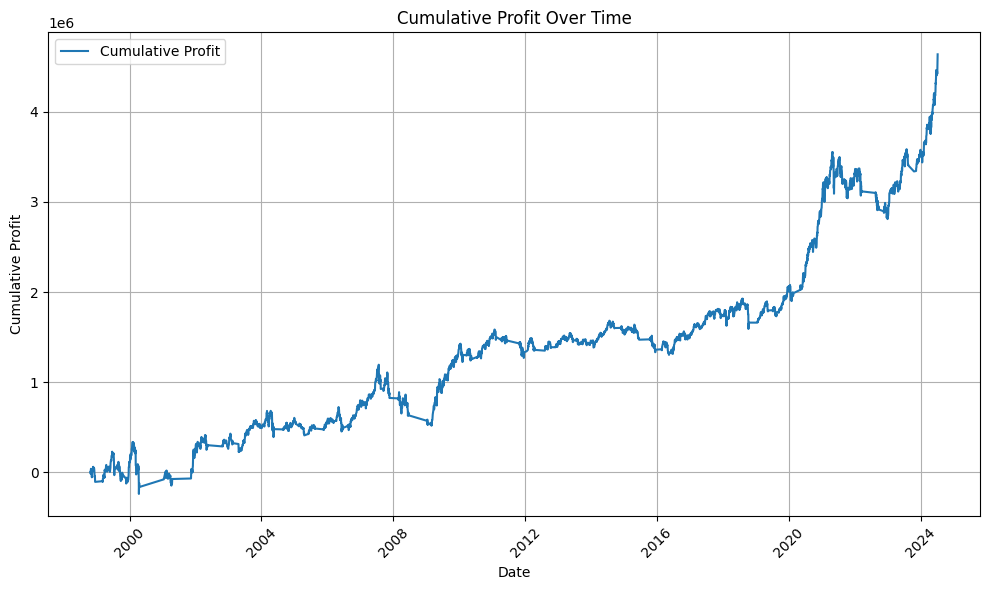

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_profit_dates,cumulative_profit, label='Cumulative Profit')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()